# Titanic Survival Prediction Model

* The sinking of the **RMS Titanic** is one of the most infamous **shipwrecks in world history**.

* On **April 15, 1912**, during her maiden voyage, the Titanic sank after colliding with an iceberg, **killing 1502 out of 2224 passengers and crew**. 
* This sensational tragedy shocked the international community and led to better **safety regulations for ships**.

* One of the reasons it led to such loss of life was that there were not **enough lifeboats for the passengers and crew**. 

* Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as **women, children, and the upper-class**.

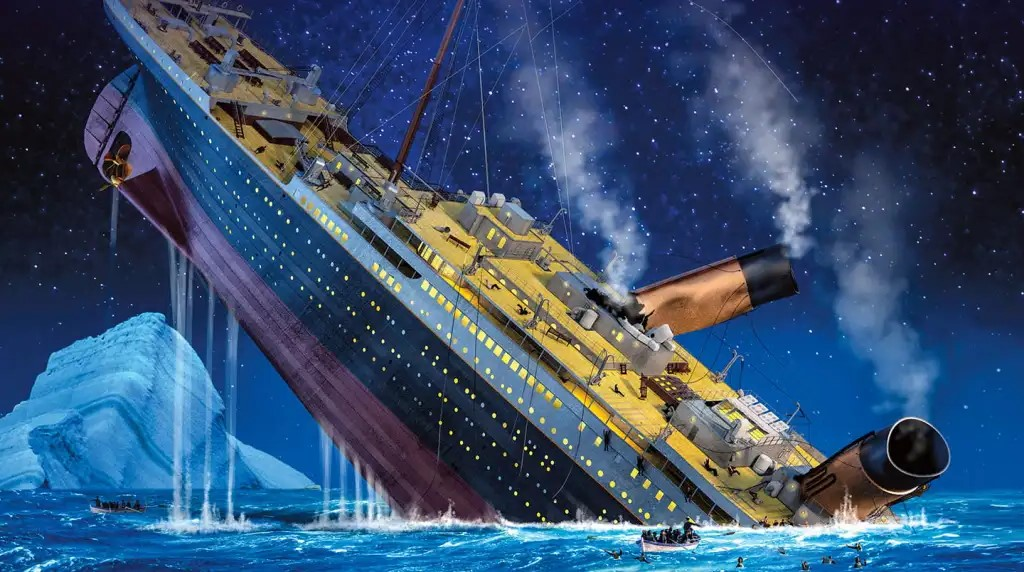

**Objective**: In this model, we need to analyse what sorts of people were likely to survive. We also need to apply the tools of machine learning to predict which passengers survived in this tragedy.

**Creator**: Anandan Raju


#### Model's Used in this Project:

1. KNeighbors Classifier        
2. Decision Tree Classifier     
3. Random Forest Classifier     
4. Gaussian Naive Bayes         
5. Support Vector Classifier    
6. Extra Tree Classifier        
7. Gradient Boosting Classifier 
8. Bagging Classifier           
9. Ada Boost Classifier         
10. Extra Trees Classifier   

### Synopsis

1. Import Libraries
2. Reading DataSet
3. Checking Null Set
4. Data Set Dictionary
5. Exploratory Data Analysis
6. Feature Engineering\
    6.1 Title\
    6.2 Sex\
    6.3 Age
7. Binning\
    7.1 Age\
    7.2 Class\
    7.3 Embark\
    7.4 Fare\
    7.5 Cabin
8. Column Formation\
    8.1 Family Size Map
9. Modelling
10. Cross Validation (K-Fold)
11. Confusion Matrix
12. Convert Output into CSV

## 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## 2. Reading DataSet

In [2]:
tit_train=pd.read_csv('tit_train.csv')
tit_test=pd.read_csv('tit_test.csv')

In [3]:
tit_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 3. Checking Null Set

In [4]:
print('Titanic Train Shape:',tit_train.shape)
tit_train.isnull().sum()

Titanic Train Shape: (891, 12)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
print('Titanic Test Shape:',tit_test.shape)
tit_test.isnull().sum()

Titanic Test Shape: (418, 11)


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## 4.Data Set Dictionary

* Survived: '0' = No, '1' = Yes
* pclass: Ticket - class 1 = 1st, 2 = 2nd, 3 = 3rd
* sibsp: # of siblings / spouses aboard the Titanic
* parch: # of parents / children aboard the Titanic
* ticket: Ticket number
* cabin: Cabin number
* embarked: Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

**Total rows and columns**

We can see that there are 891 rows and 12 columns in our dataset.

In [6]:
tit_train.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [7]:
tit_test.head(4)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S


In [8]:
tit_train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891.0,NaN,NaN,NaN,446.0,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Name,891,891,"Braund, Mr. Owen Harris",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
SibSp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


In [9]:
tit_test.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,418.0,NaN,NaN,NaN,1100.5,120.810458,892.0,996.25,1100.5,1204.75,1309.0
Pclass,418.0,NaN,NaN,NaN,2.26555,0.841838,1.0,1.0,3.0,3.0,3.0
Name,418,418,"Kelly, Mr. James",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,418,2,male,266,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,332.0,NaN,NaN,NaN,30.27259,14.181209,0.17,21.0,27.0,39.0,76.0
SibSp,418.0,NaN,NaN,NaN,0.447368,0.89676,0.0,0.0,0.0,1.0,8.0
Parch,418.0,NaN,NaN,NaN,0.392344,0.981429,0.0,0.0,0.0,0.0,9.0
Ticket,418,363,PC 17608,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,417.0,NaN,NaN,NaN,35.627188,55.907576,0.0,7.8958,14.4542,31.5,512.3292
Cabin,91,76,B57 B59 B63 B66,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
tit_test['Survived']=""
tit_test.head(4)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,


## 5. Exploratory Data Analysis

#### **Bar Chart for Categorical Features**

* Pclass
* Sex
* SibSp ( # of siblings and spouse)
* Parch ( # of parents and children)
* Embarked
* Cabin

In [11]:
tit_train['Survived']==1

0      False
1       True
2       True
3       True
4      False
       ...  
886    False
887     True
888    False
889     True
890    False
Name: Survived, Length: 891, dtype: bool

In [12]:
tit_train[tit_train['Survived']==1].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [13]:
# Survived: '0' = No, '1' = Yes

def bar_chart(feature):
    survived=tit_train[tit_train['Survived']==1][feature].value_counts()
    dead=tit_train[tit_train['Survived']==0][feature].value_counts()
    df=pd.DataFrame([survived,dead])
    df.index=['Survived','Dead']
    df.plot(kind='bar',figsize=(12,7),edgecolor='black')

Survived:
 female    233
male      109
Name: Sex, dtype: int64
Dead:
 male      468
female     81
Name: Sex, dtype: int64


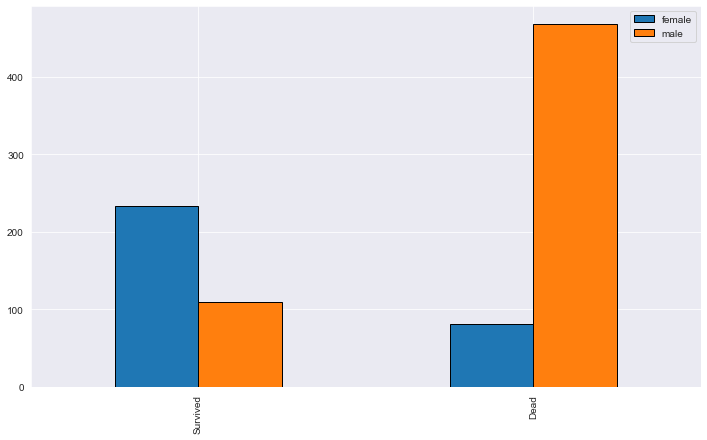

In [14]:
bar_chart('Sex')
print('Survived:\n',tit_train[tit_train['Survived']==1]['Sex'].value_counts())
print('Dead:\n',tit_train[tit_train['Survived']==0]['Sex'].value_counts())

The Chart Confirms **Women more likely Survived than Men**

Survived:
 1    136
3    119
2     87
Name: Pclass, dtype: int64
Dead:
 3    372
2     97
1     80
Name: Pclass, dtype: int64


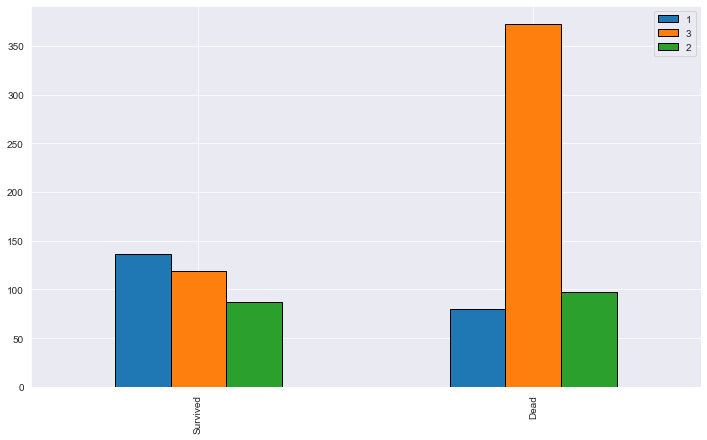

In [15]:
# Pclass: Ticket - class 1 = 1st, 2 = 2nd, 3 = 3rd

bar_chart('Pclass')
print('Survived:\n',tit_train[tit_train['Survived']==1]['Pclass'].value_counts())
print('Dead:\n',tit_train[tit_train['Survived']==0]['Pclass'].value_counts())

The Chart Confirms **1st Class** more likely "Survived" than **other classes**\
The Chart Confirms **3rd Class** more likely "Dead" than **other classes**

Survived:
 0    210
1    112
2     13
3      4
4      3
Name: SibSp, dtype: int64
Dead:
 0    398
1     97
4     15
2     15
3     12
8      7
5      5
Name: SibSp, dtype: int64


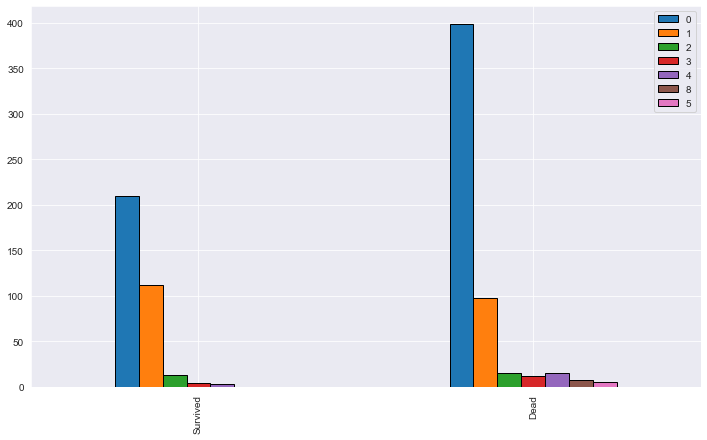

In [16]:
# SibSp: # of Siblings / Spouses aboard the Titanic

bar_chart('SibSp')
print('Survived:\n',tit_train[tit_train['Survived']==1]['SibSp'].value_counts())
print('Dead:\n',tit_train[tit_train['Survived']==0]['SibSp'].value_counts())

The Chart confirms a **person aboarded with more than 2 siblings or spouse** more likely survived.\
The Chart confirms a **person aboarded without siblings or spouse** more likely dead

Survived :
 0    233
1     65
2     40
3      3
5      1
Name: Parch, dtype: int64
Dead:
 0    445
1     53
2     40
5      4
4      4
3      2
6      1
Name: Parch, dtype: int64


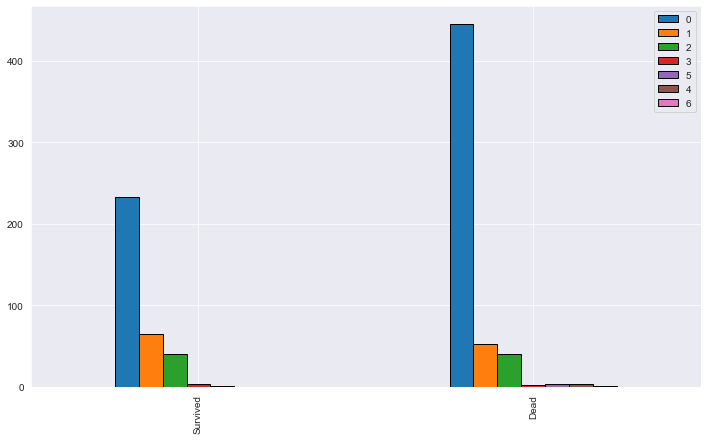

In [17]:
# Parch: # of Parents / Children aboard the Titanic

bar_chart('Parch')
print("Survived :\n",tit_train[tit_train['Survived']==1]['Parch'].value_counts())
print("Dead:\n",tit_train[tit_train['Survived']==0]['Parch'].value_counts())

The Chart confirms a **person aboarded with more than 2 parents or children more likely survived**.\
The Chart confirms a **person aboarded alone more likely dead**.

Survived :
 S    217
C     93
Q     30
Name: Embarked, dtype: int64
Dead:
 S    427
C     75
Q     47
Name: Embarked, dtype: int64


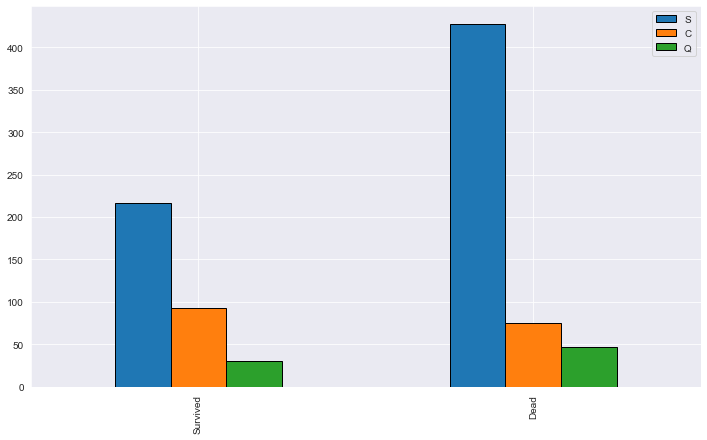

In [18]:
# Embarked: C = Cherbourg, Q = Queenstown, S = Southampton

bar_chart('Embarked')
print("Survived :\n",tit_train[tit_train['Survived']==1]['Embarked'].value_counts())
print("Dead:\n",tit_train[tit_train['Survived']==0]['Embarked'].value_counts())

The Chart confirms a **person aboarded from C** slightly more likely survived.\
The Chart confirms a **person aboarded from Q** more likely dead.\
The Chart confirms a **person aboarded from S** more likely dead.

## 6. Feature Engineering

It is the process of transforming raw data into features that better represent the underlying problem to the predictive models, resulting in improved model accuracy on unseen data. Feature engineering turn your inputs into things the algorithm can understand.

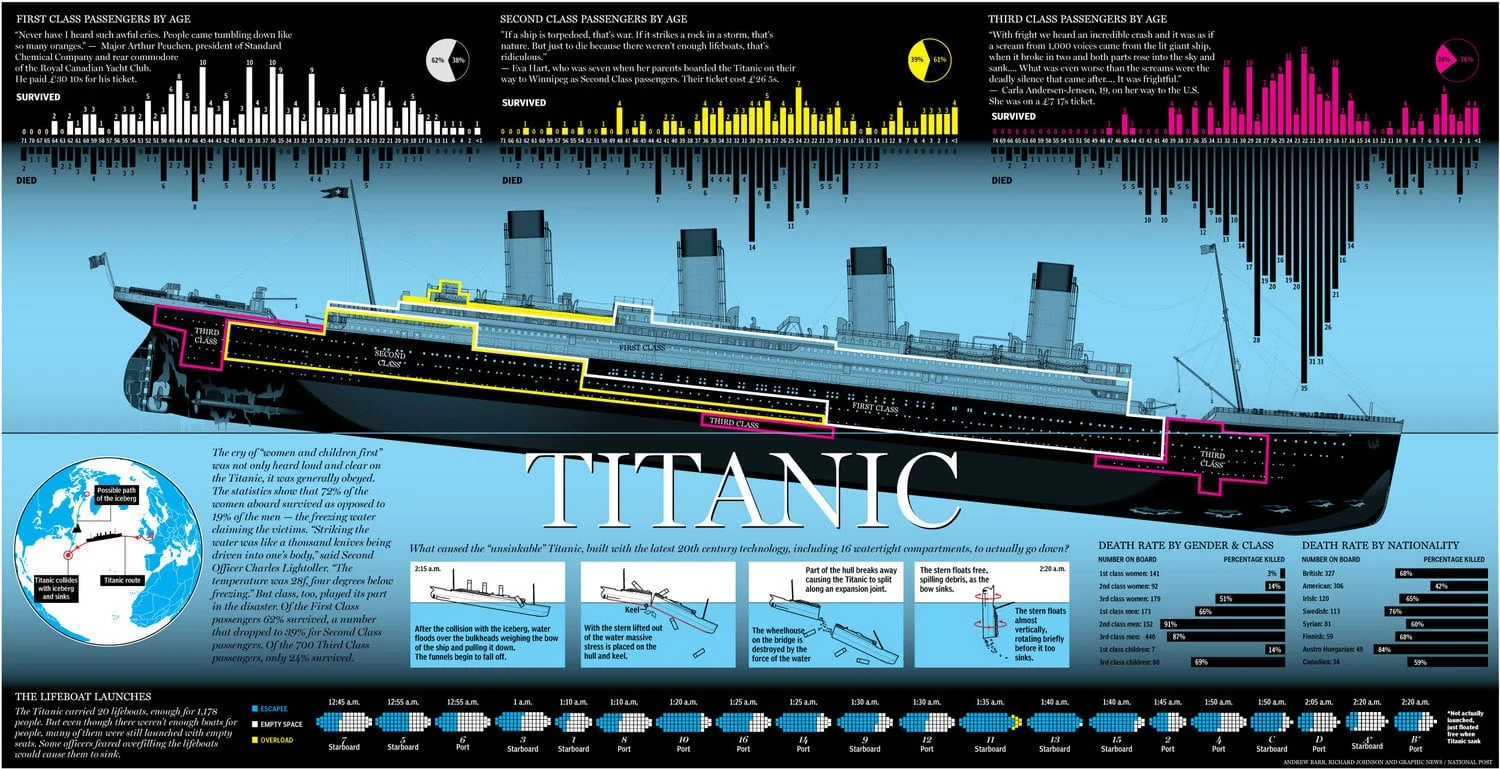

In [19]:
tit_train_test=[tit_train,tit_test]
for dataset in tit_train_test:
    dataset['Title']=dataset['Name'].str.extract(' ([A-Za-z]+)\.',expand=False)
dataset.head(4)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,,Mr


In [20]:
tit_train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [21]:
tit_test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

### 6.1 Title Map

Mr : 0\
Miss : 1\
Mrs: 2\
Others: 3

In [22]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2,"Master": 3, "Dr": 3, "Rev": 3, 
                 "Col": 3, "Major": 3,"Mlle": 3,"Countess": 3,"Ms": 3, "Lady": 3,
                 "Jonkheer": 3,"Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }

for dataset in tit_train_test:
    dataset['Title']=dataset['Title'].map(title_mapping)
dataset.head(4)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,,0


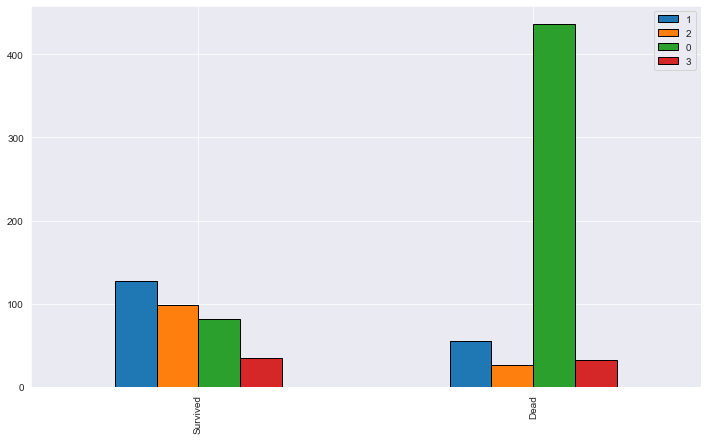

In [23]:
bar_chart('Title')

### 6.2 Sex Map

In [24]:
# Delete unnecessary feature from Dataset

tit_train.drop('Name',axis=1,inplace=True)
tit_test.drop('Name',axis=1,inplace=True)

In [25]:
sex_mapping={"male":0,'female':1}
for dataset in tit_train_test:
    dataset['Sex']=dataset['Sex'].map(sex_mapping)

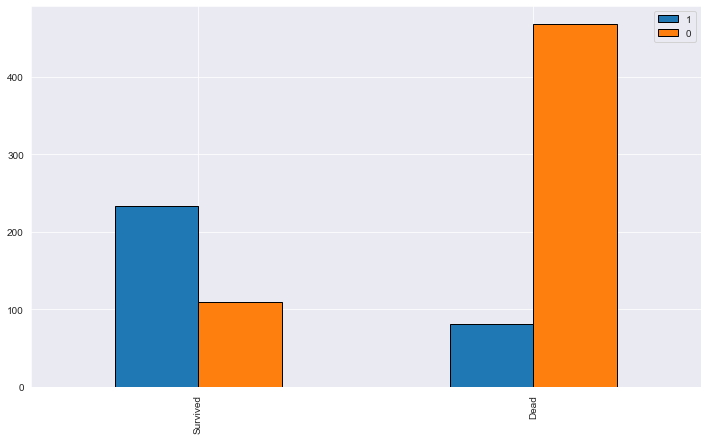

In [26]:
bar_chart('Sex')

In [27]:
tit_train.head(4)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2


In [28]:
tit_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

### 6.3 Age Map

In [29]:
tit_train['Age'].fillna(tit_train.groupby('Title')['Age'].transform('median'),inplace=True)
tit_test['Age'].fillna(tit_test.groupby('Title')['Age'].transform('median'),inplace=True)

In [30]:
tit_train.head(4)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2


In [31]:
tit_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

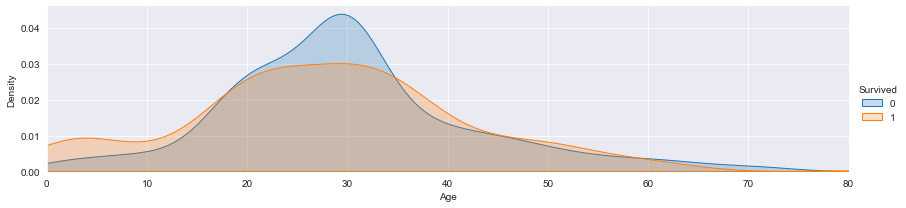

(10.0, 50.0)

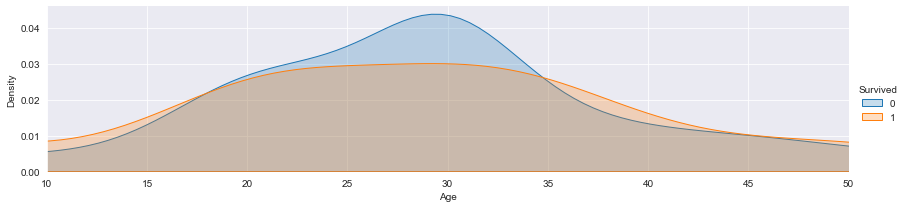

In [32]:
facet=sns.FacetGrid(tit_train,hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,tit_train['Age'].max()))
facet.add_legend()
plt.show()

facet=sns.FacetGrid(tit_train,hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,tit_train['Age'].max()))
facet.add_legend()
plt.xlim(10,50)

Those who were **20 to 30** years Old were More Dead and More Survived.

## 7. Binning

Binning/Converting Numerical Age to Categorical Variable

**Feature Vector Map:**

* Child  :0 
* Young  :1 
* Adult  :2 
* Mid-age:3 
* Senior :4

### 7.1 Age

In [33]:
dataset['Age']=dataset['Age'].astype(int)

In [34]:
for dataset in tit_train_test:
    dataset.loc[dataset['Age']<=11,'Age']=0
    dataset.loc[(dataset['Age']>11) & (dataset['Age']<=18),'Age']=1
    dataset.loc[(dataset['Age']>18) & (dataset['Age']<=22),'Age']=2
    dataset.loc[(dataset['Age']>22) & (dataset['Age']<=27),'Age']=3
    dataset.loc[(dataset['Age']>27) & (dataset['Age']<=33),'Age']=4
    dataset.loc[(dataset['Age']>33) & (dataset['Age']<=40),'Age']=5
    dataset.loc[(dataset['Age']>40) & (dataset['Age']<=66),'Age']=6
    dataset.loc[dataset['Age']>66,'Age']=6

In [35]:
dataset['Age'].value_counts()

4    110
6     76
3     64
2     60
5     46
1     34
0     28
Name: Age, dtype: int64

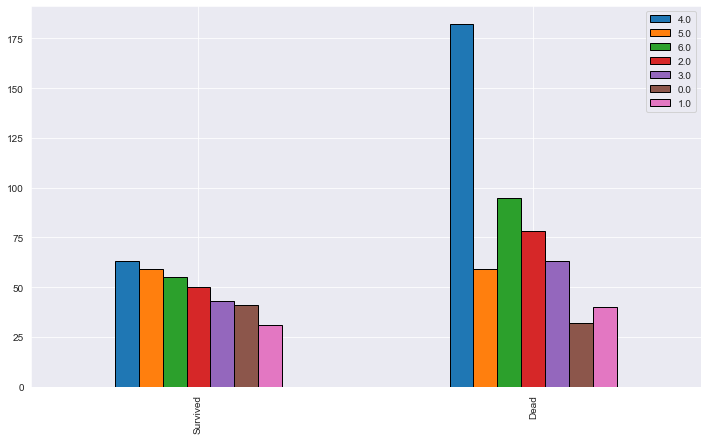

In [36]:
bar_chart('Age')

###  7.2 Class

Pclass1:
 S    127
C     85
Q      2
Name: Embarked, dtype: int64
Pclass2:
 S    164
C     17
Q      3
Name: Embarked, dtype: int64
Pclass3:
 S    353
Q     72
C     66
Name: Embarked, dtype: int64


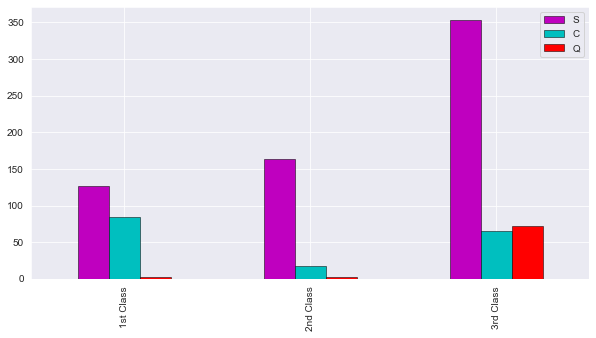

In [37]:
Pclass1=tit_train[tit_train['Pclass']==1]['Embarked'].value_counts()
Pclass2=tit_train[tit_train['Pclass']==2]['Embarked'].value_counts()
Pclass3=tit_train[tit_train['Pclass']==3]['Embarked'].value_counts()
print('Pclass1:\n',Pclass1)
print('Pclass2:\n',Pclass2)
print('Pclass3:\n',Pclass3)
df=pd.DataFrame([Pclass1,Pclass2,Pclass3])
df.index=['1st Class','2nd Class','3rd Class']
df.plot(kind='bar',figsize=(10,5),color=('m','c','r'),edgecolor='black',linewidth=0.5)
plt.show()

More than **50% of 1st Class** are from **S** Embark.\
More than **50% of 2nd Class** are from **S** Embark.\
More than **50 of 3rd Class** are from **S** Embark.

### 7.3 Embark

Fill out missing Embark with S Embark.

In [38]:
for dataset in tit_train_test:
    dataset['Embarked']=dataset['Embarked'].fillna('S')

In [39]:
dataset.columns[dataset.isna().any()]

Index(['Fare', 'Cabin'], dtype='object')

In [40]:
dataset.head(4)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Title
0,892,3,0,5,0,0,330911,7.8292,NaN,Q,,0
1,893,3,1,6,1,0,363272,7.0000,NaN,S,,2
2,894,2,0,6,0,0,240276,9.6875,NaN,Q,,0
3,895,3,0,3,0,0,315154,8.6625,NaN,S,,0


In [41]:
embarked_mapping = {'S':0,'C':1,'Q':2}
for dataset in tit_train_test:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

In [42]:
# fill missing Fare with median fare for each Pclass
tit_train["Fare"].fillna(tit_train.groupby("Pclass")["Fare"].transform("median"), inplace=True)
tit_test["Fare"].fillna(tit_test.groupby("Pclass")["Fare"].transform("median"), inplace=True)
tit_train.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,2.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,5.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,3.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,5.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,5.0,0,0,373450,8.0500,NaN,0,0


### 7.4 Fare

In [43]:
#Fill missing Fare with median for each Pclass
tit_train['Fare'].fillna(tit_train.groupby('Pclass')['Fare'].transform('median'),inplace=True)
tit_test['Fare'].fillna(tit_test.groupby('Pclass')['Fare'].transform('median'),inplace=True)
tit_train.head(6)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,2.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,5.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,3.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,5.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,5.0,0,0,373450,8.0500,NaN,0,0
5,6,0,3,0,4.0,0,0,330877,8.4583,NaN,2,0


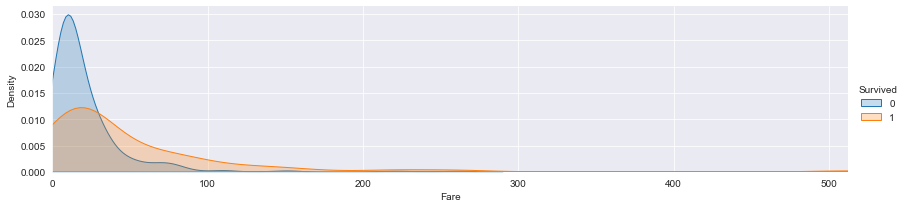

(0.0, 20.0)

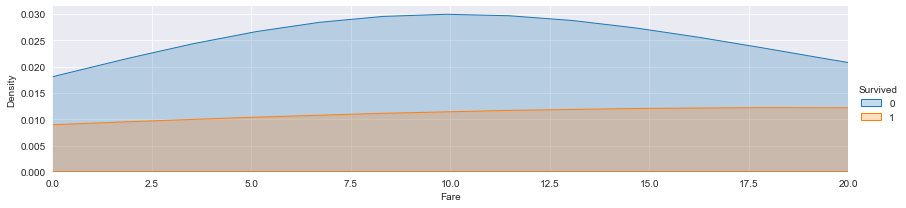

In [44]:
facet=sns.FacetGrid(tit_train,hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Fare',shade=True)
facet.set(xlim=(0,tit_train['Fare'].max()))
facet.add_legend()
plt.show()

facet=sns.FacetGrid(tit_train,hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Fare',shade=True)
facet.set(xlim=(0,tit_train['Fare'].max()))
facet.add_legend()
plt.xlim(0,20)

### 7.5 Cabin

In [45]:
dataset.columns[dataset.isna().any()]

Index(['Cabin'], dtype='object')

In [46]:
for dataset in tit_train_test:
    dataset['Cabin']=dataset['Cabin'].str[:1]
    
dataset['Cabin']

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
413    NaN
414      C
415    NaN
416    NaN
417    NaN
Name: Cabin, Length: 418, dtype: object

<AxesSubplot:>

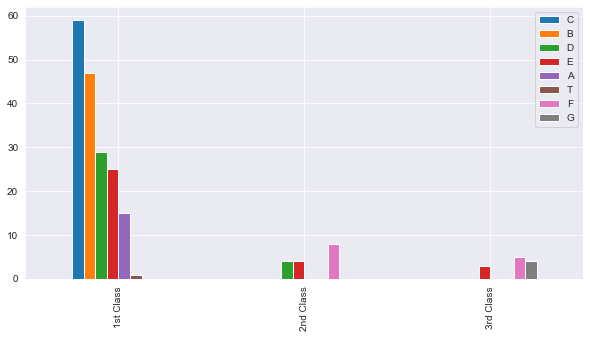

In [47]:
Pclass1=tit_train[tit_train['Pclass']==1]['Cabin'].value_counts()
Pclass2=tit_train[tit_train['Pclass']==2]['Cabin'].value_counts()
Pclass3=tit_train[tit_train['Pclass']==3]['Cabin'].value_counts()
df=pd.DataFrame([Pclass1,Pclass2,Pclass3])
df.index=['1st Class','2nd Class','3rd Class']
df.plot(kind='bar',figsize=(10,5))

#### 7.5.1 Cabin Map

In [48]:
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
for dataset in tit_train_test:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [49]:
# fill missing Fare with median fare for each Pclass
tit_train["Cabin"].fillna(tit_train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
tit_test["Cabin"].fillna(tit_test.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

In [50]:
dataset.columns[dataset.isna().any()]

Index([], dtype='object')

In [51]:
dataset.isna().any()

PassengerId    False
Pclass         False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin          False
Embarked       False
Survived       False
Title          False
dtype: bool

In [52]:
# fill missing Fare with median fare for each Pclass
tit_train["Cabin"].fillna(tit_train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
tit_test["Cabin"].fillna(tit_test.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

## 8. Column Formation

In [53]:
tit_train["FamilySize"] = tit_train["SibSp"] + tit_train["Parch"] + 1
tit_test["FamilySize"] = tit_test["SibSp"] + tit_test["Parch"] + 1

(0.0, 11.0)

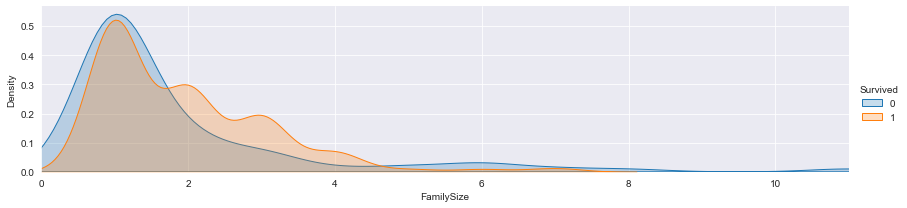

In [54]:
facet=sns.FacetGrid(tit_train,hue='Survived',aspect=4)
facet.map(sns.kdeplot,'FamilySize',shade=True)
facet.set(xlim=(0,tit_train['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)

In [55]:
tit_train['FamilySize'].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: FamilySize, dtype: int64

### 8.1 Family Size Map

In [56]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in tit_train_test:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [57]:
features_drop=['Ticket','SibSp','Parch']
tit_train=tit_train.drop(features_drop,axis=1)
tit_test=tit_test.drop(features_drop,axis=1)
tit_train=tit_train.drop(['PassengerId'],axis=1)

In [58]:
train_data=tit_train.drop('Survived',axis=1)
target=tit_train['Survived']
train_data.shape,target.shape

((891, 8), (891,))

In [59]:
train_data

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,2.0,7.2500,2.0,0,0,0.4
1,1,1,5.0,71.2833,0.8,1,2,0.4
2,3,1,3.0,7.9250,2.0,0,1,0.0
3,1,1,5.0,53.1000,0.8,0,2,0.4
4,3,0,5.0,8.0500,2.0,0,0,0.0
...,...,...,...,...,...,...,...,...
886,2,0,3.0,13.0000,1.8,0,3,0.0
887,1,1,2.0,30.0000,0.4,0,1,0.0
888,3,1,2.0,23.4500,2.0,0,1,1.2
889,1,0,3.0,30.0000,0.8,1,0,0.0


In [60]:
target

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
x_train,x_test,y_train,y_test=train_test_split(train_data,target,random_state=42,test_size=0.25)
print('Train Size = {} \nTest Size = {} \nTotal Size = {}'.format(x_train.shape[0],x_test.shape[0],train_data.shape[0]))

Train Size = 668 
Test Size = 223 
Total Size = 891


## 9. Model Analysis

In [68]:
# Importing Classifier Modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

In [69]:
tit_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   Fare        891 non-null    float64
 5   Cabin       891 non-null    float64
 6   Embarked    891 non-null    int64  
 7   Title       891 non-null    int64  
 8   FamilySize  891 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 62.8 KB


In [70]:
clf = [KNeighborsClassifier(n_neighbors = 13),DecisionTreeClassifier(),
       RandomForestClassifier(n_estimators=13),GaussianNB(),SVC(),ExtraTreeClassifier(),
      GradientBoostingClassifier(n_estimators=10),BaggingClassifier(),AdaBoostClassifier(),ExtraTreesClassifier()]

def model_fitting():
    for i in range(len(clf)):
        fit=clf[i].fit(x_train,y_train)
        print(fit)
model_fitting()


KNC=KNeighborsClassifier(n_neighbors = 13)
KNC.fit(x_train,y_train)
y_pred_knc=KNC.predict(x_test)

DTC=DecisionTreeClassifier()
DTC.fit(x_train,y_train)
y_pred_dtc=DTC.predict(x_test)

RFC=RandomForestClassifier(n_estimators=13)
RFC.fit(x_train,y_train)
y_pred_rfc=RFC.predict(x_test)

GNB=GaussianNB()
GNB.fit(x_train,y_train)
y_pred_gnb=GNB.predict(x_test)

SVC=SVC()
SVC.fit(x_train,y_train)
y_pred_svc=SVC.predict(x_test)

ETC=ExtraTreeClassifier()
ETC.fit(x_train,y_train)
y_pred_etc=ETC.predict(x_test)

GBC=GradientBoostingClassifier(n_estimators=10)
GBC.fit(x_train,y_train)
y_pred_gbc=GBC.predict(x_test)

BC=BaggingClassifier()
BC.fit(x_train,y_train)
y_pred_bc=BC.predict(x_test)

ABC=AdaBoostClassifier()
ABC.fit(x_train,y_train)
y_pred_abc=ABC.predict(x_test)

ETsC=ExtraTreesClassifier()
ETsC.fit(x_train,y_train)
y_pred_etsc=ETsC.predict(x_test)

KNeighborsClassifier(n_neighbors=13)
DecisionTreeClassifier()
RandomForestClassifier(n_estimators=13)
GaussianNB()
SVC()
ExtraTreeClassifier()
GradientBoostingClassifier(n_estimators=10)
BaggingClassifier()
AdaBoostClassifier()
ExtraTreesClassifier()


In [71]:
model=['KNeighbors Classifier       ','Decision Tree Classifier    ','Random Forest Classifier    ',
       'Gaussian Naive Bayes        ','Support Vector Classifier   ','Extra Tree Classifier       ',
      'Gradient Boosting Classifier','Bagging Classifier          ','Ada Boost Classifier        ',
       'Extra Trees Classifier      ']
accuracy=['KNC_Acc','DTC_Acc','RFC_Acc','GNB-Acc','SVC_Acc','ETC_Acc','GBC_Acc','BC_Acc','ABC_Acc','ETsC_Acc']

def model_accuracy():
    print("Accuracy Score of Each Model\n")
    for i in range(len(clf)):
        accuracy[i]=clf[i].score(train_data,target)*100
        print(model[i],':',round(accuracy[i],3))
model_accuracy()

Accuracy Score of Each Model

KNeighbors Classifier        : 77.666
Decision Tree Classifier     : 92.256
Random Forest Classifier     : 92.031
Gaussian Naive Bayes         : 79.798
Support Vector Classifier    : 66.554
Extra Tree Classifier        : 92.817
Gradient Boosting Classifier : 82.941
Bagging Classifier           : 92.256
Ada Boost Classifier         : 82.828
Extra Trees Classifier       : 92.48


## 10. Cross Validation (K-Fold)

In [72]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [75]:
from sklearn.svm import SVC

model=['KNeighbors Classifier       ','Decision Tree Classifier    ','Random Forest Classifier    ',
       'Gaussian Naive Bayes        ','Support Vector Classifier   ','Extra Tree Classifier       ',
      'Gradient Boosting Classifier','Bagging Classifier          ','Ada Boost Classifier        ',
       'Extra Trees Classifier      ']
clf = [KNeighborsClassifier(n_neighbors = 13),DecisionTreeClassifier(),
       RandomForestClassifier(n_estimators=13),GaussianNB(),SVC(),ExtraTreeClassifier(),
      GradientBoostingClassifier(n_estimators=10),BaggingClassifier(),AdaBoostClassifier(),ExtraTreesClassifier()]
def model_fit():
    scoring = 'accuracy'
    print("Cross Validation Score of Each Model\n")
    for i in range(len(clf)):
        score = cross_val_score(clf[i], train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
        print(model[i],":",round(np.mean(score)*100,2))
#     round(np.mean(score)*100,2)
#     print("Score of :\n",score)
def model_fit_array():
    scoring = 'accuracy'
    print("\nPredicted Values of First 5 Model's")
    for i in range(len(clf)):
        score = cross_val_score(clf[i], train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
        if i<=4:
            print('\n',model[i],'\n',score)
model_fit()
model_fit_array()

Cross Validation Score of Each Model

KNeighbors Classifier        : 73.85
Decision Tree Classifier     : 78.12
Random Forest Classifier     : 80.02
Gaussian Naive Bayes         : 79.68
Support Vector Classifier    : 67.68
Extra Tree Classifier        : 78.0
Gradient Boosting Classifier : 82.38
Bagging Classifier           : 80.81
Ada Boost Classifier         : 82.49
Extra Trees Classifier       : 80.02

Predicted Values of First 5 Model's

 KNeighbors Classifier        
 [0.72222222 0.76404494 0.68539326 0.65168539 0.78651685 0.73033708
 0.75280899 0.75280899 0.7752809  0.76404494]

 Decision Tree Classifier     
 [0.77777778 0.78651685 0.80898876 0.73033708 0.80898876 0.78651685
 0.78651685 0.79775281 0.74157303 0.82022472]

 Random Forest Classifier     
 [0.84444444 0.83146067 0.82022472 0.7752809  0.85393258 0.78651685
 0.80898876 0.83146067 0.76404494 0.84269663]

 Gaussian Naive Bayes         
 [0.81111111 0.75280899 0.7752809  0.75280899 0.75280899 0.83146067
 0.79775281 0.8202

## 11. Confusion Matrix

* A confusion matrix is a performance measurement technique for Machine learning classification. It is a kind of table which helps you to the know the performance of the classification model on a set of test data for that the true values are known. The term confusion matrix itself is very simple, but its related terminology can be a little confusing. Here, some simple explanation is given for this technique.
> **The confusion matrix shows the ways in which your classification model is confused when it makes predictions.**


Confusion Matrix of Model's

 KNeighbors Classifier        
 [[110  29]
 [ 24  60]]

 Decision Tree Classifier     
 [[111  21]
 [ 23  68]]

 Random Forest Classifier     
 [[114  20]
 [ 20  69]]

 Gaussian Naive Bayes         
 [[104  17]
 [ 30  72]]

 Support Vector Classifier    
 [[125  67]
 [  9  22]]

 Extra Tree Classifier        
 [[109  21]
 [ 25  68]]

 Gradient Boosting Classifier 
 [[113  22]
 [ 21  67]]

 Bagging Classifier           
 [[117  18]
 [ 17  71]]

 Ada Boost Classifier         
 [[108  17]
 [ 26  72]]
AxesSubplot(0.125,0.125;0.62x0.755)


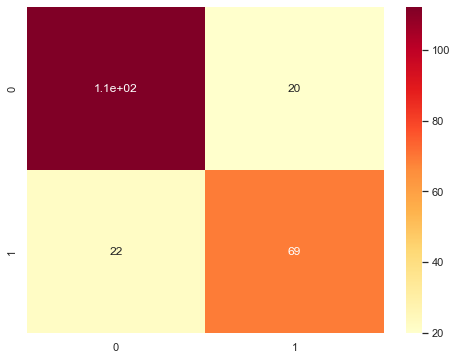

In [83]:
cf_ypred=[y_pred_knc,y_pred_dtc,y_pred_rfc,y_pred_gnb,y_pred_svc,y_pred_etc,
          y_pred_gbc,y_pred_bc,y_pred_abc,y_pred_etsc]
from sklearn.metrics import confusion_matrix
def confusion():
    print("\nConfusion Matrix of Model's")
    for i in range(len(cf_ypred)):
        cm=confusion_matrix(cf_ypred[i],y_test)
        if i<=8:
            sns.set(rc={'figure.figsize':(8,6)})
            print('\n',model[i],'\n',cm)
    sns.set(rc={'figure.figsize':(8,6)})
    heat=sns.heatmap(cm,annot=True,cmap='YlOrRd')
    print(heat)
            
confusion()

## 12. Convert Output into CSV

In [80]:
clf1 = SVC()
clf1.fit(train_data, target)
test_data = tit_test.drop(['Survived','PassengerId'], axis=1)
prediction = clf1.predict(test_data)

In [81]:
test_data['Survived'] = prediction
submission = pd.DataFrame(tit_test['PassengerId'],test_data['Survived'])
submission.to_csv("Submission.csv")
print("Output of 'Titanic Survival Predicted Model Data' is Converted into CSV file")

Output of 'Titanic Survival Predicted Model Data' is Converted into CSV file
